* **단항회귀분석**
> -> rent_num과의 단일회귀관계 찾을 수 없음 
> -> 모든 변수 시각화, 회귀추세선 그림

In [1]:
import pandas as pd
df = pd.read_csv('final_dataset_num.csv')
df.head()

,Unnamed: 0,time,place,temp(°C),rain(mm),wind(m/s),NO2(ppm),ozone(ppm),CO2(ppm),SO2(ppm),dust,micro dust,rent_num
0,0,2017-06-05,서초구,23.5,0.0,1.3,0.029,0.047,0.4,0.005,29.0,14.0,25
1,1,2017-06-06,서초구,18.9,8.5,1.8,0.017,0.042,0.3,0.005,21.0,10.0,14
2,2,2017-06-07,서초구,18.2,9.5,1.6,0.020,0.030,0.4,0.005,18.0,9.0,18
3,3,2017-06-08,서초구,20.5,0.0,1.3,0.019,0.056,0.6,0.006,47.0,28.0,34
4,4,2017-06-09,서초구,22.0,0.0,1.7,0.017,0.061,0.5,0.006,60.0,33.0,25


In [2]:
#디스플레이 한도 늘리기
pd.set_option('display.max_columns', 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10438 entries, 0 to 10437
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10438 non-null  int64  
 1   time        10438 non-null  object 
 2   place       10438 non-null  object 
 3   temp(°C)    10438 non-null  float64
 4   rain(mm)    10438 non-null  float64
 5   wind(m/s)   10438 non-null  float64
 6   NO2(ppm)    10438 non-null  float64
 7   ozone(ppm)  10438 non-null  float64
 8   CO2(ppm)    10438 non-null  float64
 9   SO2(ppm)    10438 non-null  float64
 10  dust        10438 non-null  float64
 11  micro dust  10438 non-null  float64
 12  rent_num    10438 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 1.0+ MB


In [4]:
df.describe()

,Unnamed: 0,temp(°C),rain(mm),wind(m/s),NO2(ppm),...,CO2(ppm),SO2(ppm),dust,micro dust,rent_num
count,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000,...,10438.000000,10438.000000,10438.000000,10438.000000,10438.000000
mean,5218.500000,13.783359,3.371336,1.615453,0.028228,...,0.502251,0.003837,39.600786,22.873443,1510.975378
std,3013.335389,10.473047,12.333431,0.732878,0.064758,...,0.195346,0.001329,23.721079,15.633736,1463.952216
min,0.000000,-14.900000,0.000000,0.100000,0.000000,...,0.100000,0.001000,3.000000,1.000000,1.000000
25%,2609.250000,4.900000,0.000000,1.100000,0.018000,...,0.400000,0.003000,24.000000,12.000000,509.000000
50%,5218.500000,14.600000,0.000000,1.400000,0.025000,...,0.500000,0.004000,35.000000,20.000000,1109.000000
75%,7827.750000,23.000000,0.000000,1.900000,0.035000,...,0.600000,0.005000,51.000000,29.000000,1904.000000
max,10437.000000,34.200000,148.500000,6.700000,6.523000,...,1.700000,0.015000,243.000000,144.000000,10265.000000


# 열의 최대값에서 최소값으로 뺀 값으로 나눔 
# 모든 데이터가 0과 1사이에 들어옴

In [5]:
#scaling-minmax
#temp
df['temp(°C)'] = (df['temp(°C)'] - df['temp(°C)'].min())/(df['temp(°C)'].max() - df['temp(°C)'].min())
#df['temp(°C)'].head()
#rain
df['rain(mm)'] = (df['rain(mm)'] - df['rain(mm)'].min())/(df['rain(mm)'].max() - df['rain(mm)'].min())
#df['rain(mm)'].head()
df['wind(m/s)'] = (df['wind(m/s)'] - df['wind(m/s)'].min())/(df['wind(m/s)'].max() - df['wind(m/s)'].min())
df['wind(m/s)'].head()


0    0.181818
1    0.257576
2    0.227273
3    0.181818
4    0.242424
Name: wind(m/s), dtype: float64

#단순회귀분석 1. temp, rain, wind, 2. no2, ozone, co2, so2 3.dust, microdust
# 1. temp, rain, wind

In [6]:
ndf1 = df[['rent_num', 'temp(°C)', 'rain(mm)', 'wind(m/s)']]
ndf1.head()

,rent_num,temp(°C),rain(mm),wind(m/s)
0,25,0.782077,0.000000,0.181818
1,14,0.688391,0.057239,0.257576
2,18,0.674134,0.063973,0.227273
3,34,0.720978,0.000000,0.181818
4,25,0.751527,0.000000,0.242424


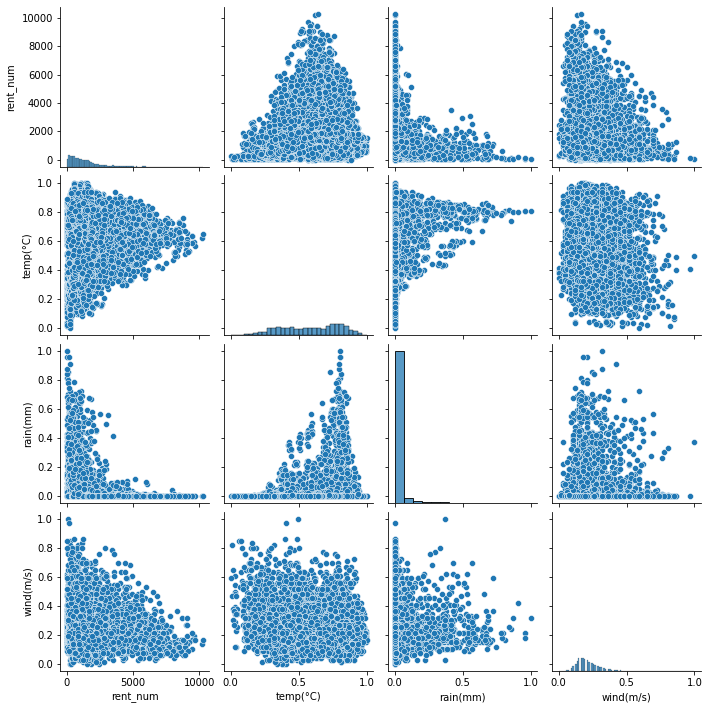

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

grid_ndf1 = sns.pairplot(ndf1)
plt.show()
plt.close()

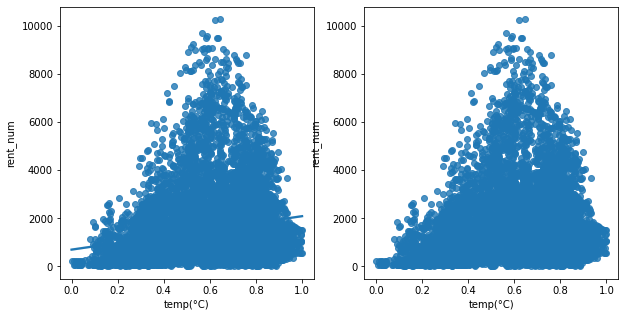

In [8]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'temp(°C)', y = 'rent_num', data = ndf1, ax = ax1) #회귀선 표시
sns.regplot(x = 'temp(°C)', y = 'rent_num', data = ndf1, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()


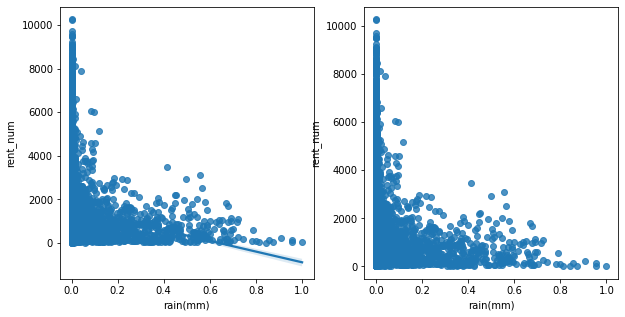

In [9]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'rain(mm)', y = 'rent_num', data = ndf1, ax = ax1) #회귀선 표시
sns.regplot(x = 'rain(mm)', y = 'rent_num', data = ndf1, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()


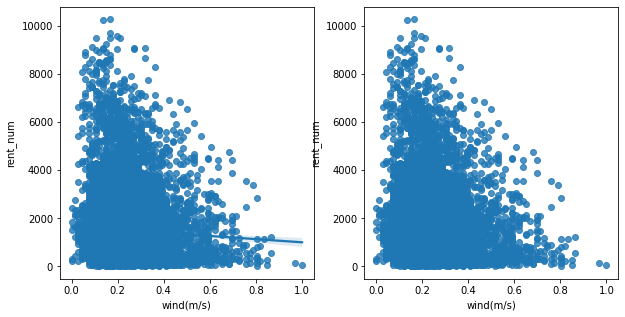

In [10]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'wind(m/s)', y = 'rent_num', data = ndf1, ax = ax1) #회귀선 표시
sns.regplot(x = 'wind(m/s)', y = 'rent_num', data = ndf1, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()


#단순회귀분석 1. temp, rain, wind, 2. no2, ozone, co2, so2 3.dust, microdust
# 2. no2, ozone, co2, so2

In [11]:
ndf2 = df[['rent_num', 'NO2(ppm)', 'ozone(ppm)', 'CO2(ppm)', 'SO2(ppm)']]
ndf2.head()

,rent_num,NO2(ppm),ozone(ppm),CO2(ppm),SO2(ppm)
0,25,0.029,0.047,0.4,0.005
1,14,0.017,0.042,0.3,0.005
2,18,0.020,0.030,0.4,0.005
3,34,0.019,0.056,0.6,0.006
4,25,0.017,0.061,0.5,0.006


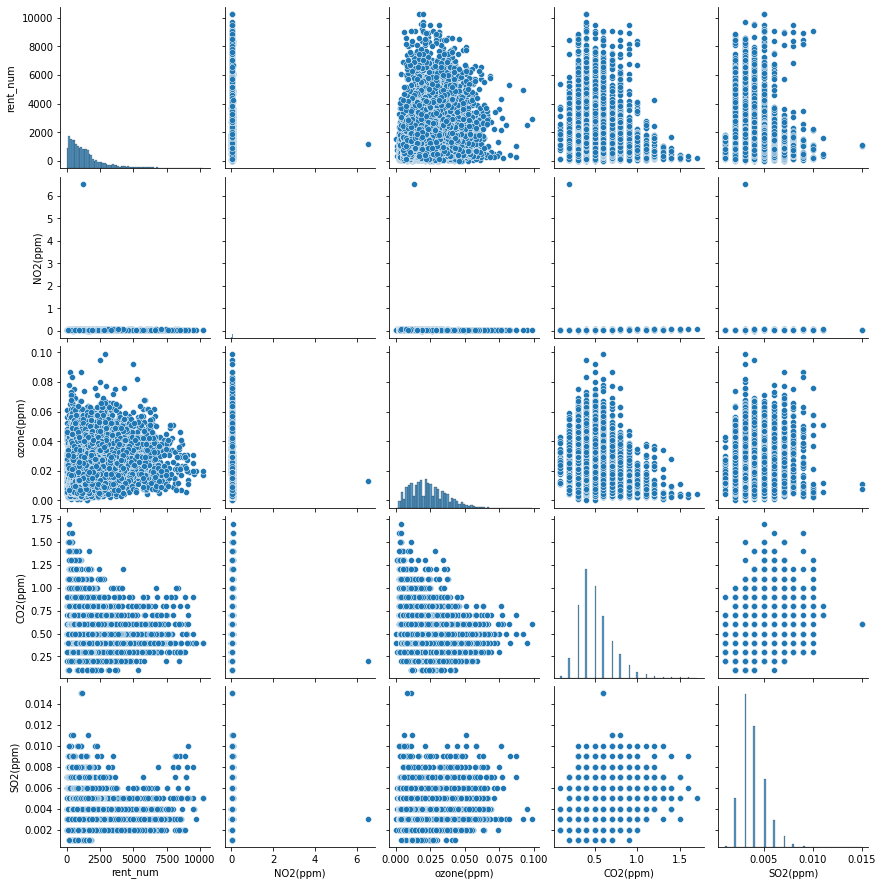

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

grid_ndf2 = sns.pairplot(ndf2)
plt.show()
plt.close()

In [13]:
#scaling-minmax

df['NO2(ppm)'] = (df['NO2(ppm)'] - df['NO2(ppm)'].min())/(df['NO2(ppm)'].max() - df['NO2(ppm)'].min())
print(df['NO2(ppm)'].head())

df['ozone(ppm)'] = (df['ozone(ppm)'] - df['ozone(ppm)'].min())/(df['ozone(ppm)'].max() - df['ozone(ppm)'].min())
print(df['ozone(ppm)'].head())

df['CO2(ppm)'] = (df['CO2(ppm)'] - df['CO2(ppm)'].min())/(df['CO2(ppm)'].max() - df['CO2(ppm)'].min())
print(df['CO2(ppm)'].head())

df['SO2(ppm)'] = (df['SO2(ppm)'] - df['SO2(ppm)'].min())/(df['SO2(ppm)'].max() - df['SO2(ppm)'].min())
print(df['SO2(ppm)'].head())

0    0.004446
1    0.002606
2    0.003066
3    0.002913
4    0.002606
Name: NO2(ppm), dtype: float64
0    0.474747
1    0.424242
2    0.303030
3    0.565657
4    0.616162
Name: ozone(ppm), dtype: float64
0    0.1875
1    0.1250
2    0.1875
3    0.3125
4    0.2500
Name: CO2(ppm), dtype: float64
0    0.285714
1    0.285714
2    0.285714
3    0.357143
4    0.357143
Name: SO2(ppm), dtype: float64


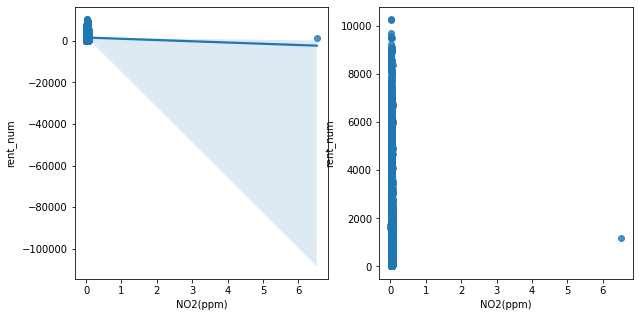

In [14]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'NO2(ppm)', y = 'rent_num', data = ndf2, ax = ax1) #회귀선 표시
sns.regplot(x = 'NO2(ppm)', y = 'rent_num', data = ndf2, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()

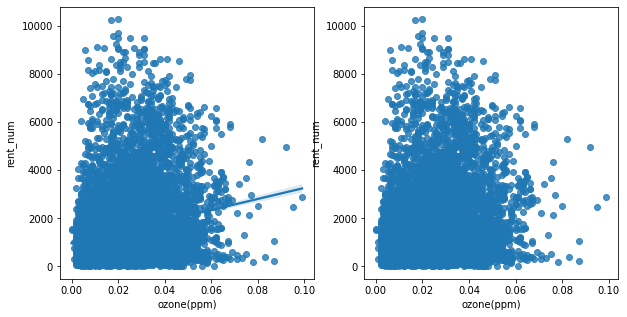

In [15]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'ozone(ppm)', y = 'rent_num', data = ndf2, ax = ax1) #회귀선 표시
sns.regplot(x = 'ozone(ppm)', y = 'rent_num', data = ndf2, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()

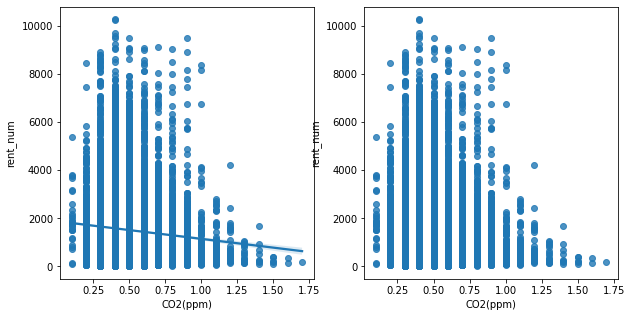

In [16]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'CO2(ppm)', y = 'rent_num', data = ndf2, ax = ax1) #회귀선 표시
sns.regplot(x = 'CO2(ppm)', y = 'rent_num', data = ndf2, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()

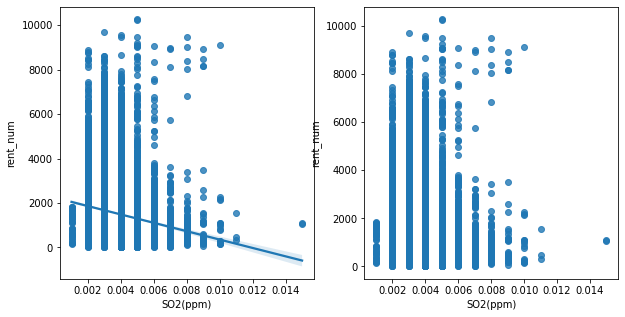

In [17]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'SO2(ppm)', y = 'rent_num', data = ndf2, ax = ax1) #회귀선 표시
sns.regplot(x = 'SO2(ppm)', y = 'rent_num', data = ndf2, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()

#단순회귀분석 1. temp, rain, wind, 2. no2, ozone, co2, so2 3.dust, microdust
# 3. dust, microdust

In [18]:
ndf3 = df[['rent_num','dust', 'micro dust']]
ndf3.head()

,rent_num,dust,micro dust
0,25,29.0,14.0
1,14,21.0,10.0
2,18,18.0,9.0
3,34,47.0,28.0
4,25,60.0,33.0


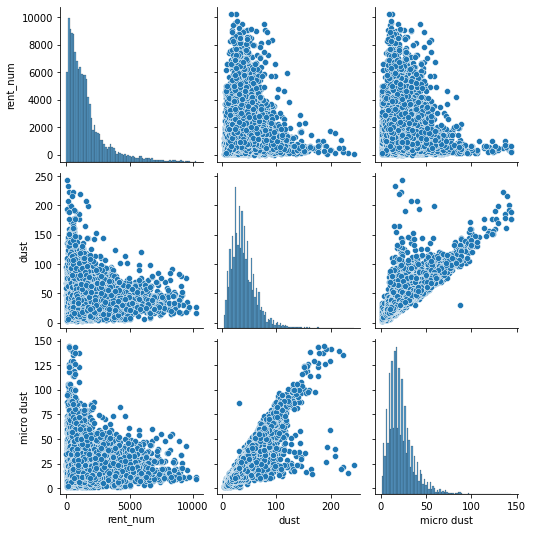

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

grid_ndf3 = sns.pairplot(ndf3)
plt.show()
plt.close()

In [20]:
#scaling-minmax

df['dust'] = (df['dust'] - df['dust'].min())/(df['dust'].max() - df['dust'].min())
print(df['dust'].head())

df['micro dust'] = (df['micro dust'] - df['micro dust'].min())/(df['micro dust'].max() - df['micro dust'].min())
print(df['micro dust'].head())


0    0.108333
1    0.075000
2    0.062500
3    0.183333
4    0.237500
Name: dust, dtype: float64
0    0.090909
1    0.062937
2    0.055944
3    0.188811
4    0.223776
Name: micro dust, dtype: float64


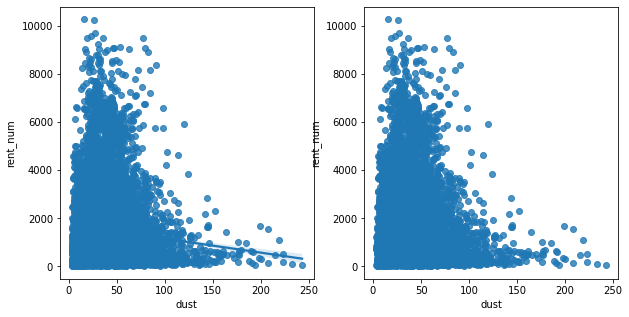

In [21]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'dust', y = 'rent_num', data = ndf3, ax = ax1) #회귀선 표시
sns.regplot(x = 'dust', y = 'rent_num', data = ndf3, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()

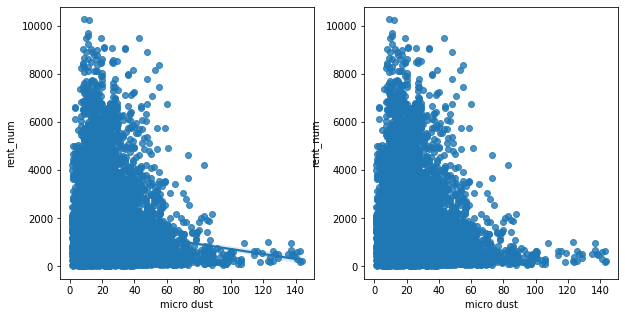

In [22]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'micro dust', y = 'rent_num', data = ndf3, ax = ax1) #회귀선 표시
sns.regplot(x = 'micro dust', y = 'rent_num', data = ndf3, ax = ax2, fit_reg = False) #회귀선 미표시
plt.show()
plt.close()

* **다항회귀분석**
> -> 2차항은 별 쓸모 없음

In [23]:
from sklearn.model_selection import train_test_split
y = ndf1['rent_num']
X = ndf1[['rain(mm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('Train : ', X_train.shape)
print('Test : ', X_test.shape)

Train :  (7306, 1)
Test :  (3132, 1)


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print(r_square)

0.01492096114329211


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
print(X_train.shape)
print(X_train_poly.shape)

(7306, 1)
(7306, 3)


In [27]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
#학습 끝난 모형에 test data 적용하여 결정계수 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.01811283991949375


* **다중회귀분석**

#다중회귀분석 1. temp, rain, wind, 2. no2, ozone, co2, so2 3.dust, microdust
# 1. temp, rain, wind

In [28]:
#ndf1 = df[['rent_num', 'temp(°C)', 'rain(mm)', 'wind(m/s)']]
#ndf1.head()

X = ndf1[['temp(°C)', 'rain(mm)', 'wind(m/s)']]
y = ndf1['rent_num']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('Train : ', X_train.shape)
print('Test : ', X_test.shape)

Train :  (7306, 3)
Test :  (3132, 3)


In [30]:
from sklearn.linear_model import LinearRegression
#모델생성
lr  = LinearRegression()

#train data 모형학습
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)

#print(lr.coef_) 회귀식의 기울기
#print(lr.intercept_) 회귀식의 y 절편



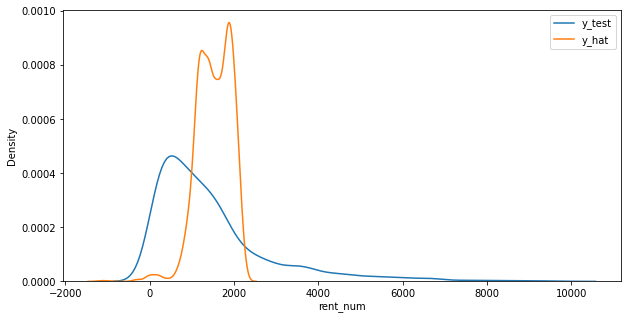

In [31]:
#train data의 산점도와 test data 로 예측한 회귀선 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y_test, label = 'y_test')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1) #예측치
plt.legend()
plt.show()

#ndf1 모델평가

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.score(X_train, y_train)

0.07437493346410673

In [34]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model, X_train, y_train, cv = 5)
r2.mean()

0.07301780514806659

#다중회귀분석 1. temp, rain, wind, 2. no2, ozone, co2, so2 3.dust, microdust
# 2. no2, ozone, co2, so2

In [35]:
#ndf2 = df[['rent_num', 'NO2(ppm)', 'ozone(ppm)', 'CO2(ppm)', 'SO2(ppm)']]
#ndf2.head()
X = ndf2[['NO2(ppm)', 'ozone(ppm)', 'CO2(ppm)', 'SO2(ppm)']]
y = ndf2['rent_num']

Train :  (7306, 4)
Test :  (3132, 4)


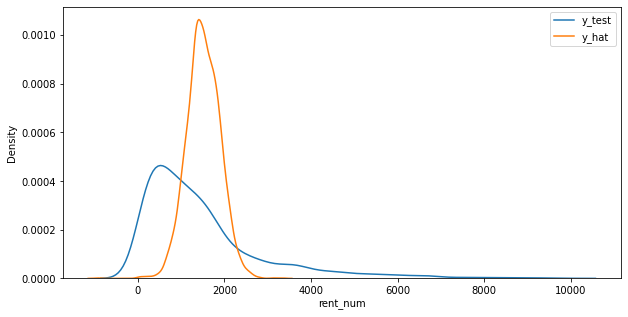

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('Train : ', X_train.shape)
print('Test : ', X_test.shape)

from sklearn.linear_model import LinearRegression
#모델생성
lr  = LinearRegression()

#train data 모형학습
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)

#print(lr.coef_) 회귀식의 기울기
#print(lr.intercept_) 회귀식의 y 절편

#train data의 산점도와 test data 로 예측한 회귀선 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y_test, label = 'y_test')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1) #예측치
plt.legend()
plt.show()

#다중회귀분석 1. temp, rain, wind, 2. no2, ozone, co2, so2 3.dust, microdust
# 3. dust, microdust

In [37]:
#ndf3 = df[['rent_num','dust', 'micro dust']]
#ndf3.head()

X = ndf3[['dust', 'micro dust']]
y = ndf3['rent_num']


Train :  (7306, 2)
Test :  (3132, 2)


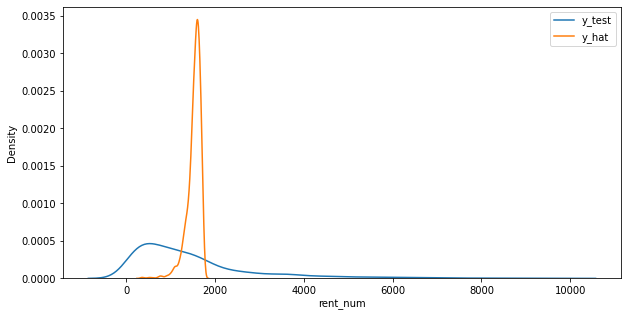

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('Train : ', X_train.shape)
print('Test : ', X_test.shape)

from sklearn.linear_model import LinearRegression
#모델생성
lr  = LinearRegression()

#train data 모형학습
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)

#print(lr.coef_) 회귀식의 기울기
#print(lr.intercept_) 회귀식의 y 절편

#train data의 산점도와 test data 로 예측한 회귀선 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y_test, label = 'y_test')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1) #예측치
plt.legend()
plt.show()

ALL

In [39]:
X = df[['temp(°C)', 'rain(mm)', 'wind(m/s)','NO2(ppm)', 'ozone(ppm)', 'CO2(ppm)', 'SO2(ppm)','dust', 'micro dust']]
y = df['rent_num']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
model.score(X_train, y_train)

0.11784627902412326

In [43]:
from sklearn.model_selection import cross_val_score

r2 = cross_val_score(model, X_train, y_train, cv = 5)
r2.mean()

0.11728008905580631

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1388.3353376316927

In [45]:
y_pred = model.predict(X_test)
y_pred

array([2281.40332898, 2281.72610579, 1548.47110816, ..., 1014.2640188 ,
       2082.28865803, 1880.46239697])

In [46]:
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

1358.5960161536307

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.09734483473504918

Feture importance


In [48]:
#from xgboost import XGBClassifier
#from xgboost import plot_importance

#model = XGBClassifier(random_state=11)
#model.fit(X_train, y_train)

#plot_importance(model, max_num_features=20)


In [52]:
#Lasso : L1_wt = 1
from statsmodels.formula.api import ols
model = ols('y ~ X', data = df)
result1 = model.fit_regularized(L1_wt = 1, alpha = 0.01)
print(result1.params)

Intercept    1452.015748
X[0]          819.379357
X[1]        -3121.418927
X[2]        -1175.252627
X[3]         -373.789510
X[4]         1762.761201
X[5]         1137.024606
X[6]        -2826.581137
X[7]          551.062740
X[8]        -1880.442560
dtype: float64


In [56]:
#Ridge : L1_wt = 0

from statsmodels.formula.api import ols
model = ols('y ~ X', data = df)
result1 = model.fit_regularized(L1_wt = 0, alpha = 0.01)
print(result1.params)

[ 1000.20017422   963.20986942 -1215.57916998  -343.33004183
    -6.34750899  1040.31779459   281.97955757  -958.65558995
  -105.07982837  -415.59390824]


In [57]:
#Elastic net : L1_wt = 0.5

from statsmodels.formula.api import ols
model = ols('y ~ X', data = df)
result1 = model.fit_regularized(L1_wt = 0.5, alpha = 0.01)
print(result1.params)

Intercept    1126.443437
X[0]          934.093955
X[1]        -1761.675774
X[2]         -578.388223
X[3]          -10.752561
X[4]         1263.449570
X[5]          457.346619
X[6]        -1446.718219
X[7]          -96.366276
X[8]         -651.577372
dtype: float64
